# Exploratory Data Analysis 

## Index:
* [Understanding-data](#Understanding-data)
 * [neighbourhood_overview](#neighbourhood_overview)
 * [host_identity_verified](#host_identity_verified)
 * [price](#price)
 * [Neighbourhood](#neighbourhood)
    * [Limpieza de datos](#limpieza_datos)
    * [EDA con la variable neighbourhood](#eda_neighborhood)
* [Second Bullet Header](#second-bullet)

## Importing packages

In [561]:
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
#import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
import seaborn as sns

# Understanding / Cleaning the data <a class="anchor" id="Understanding-data"></a>

In [562]:
# download the data
Airbnb_data = pd.read_csv('LosAngeles/listings_2.csv')
#make the price column into floats instead of strings
Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float) 

In [563]:
# veiw the data
Airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210807024723,2021-08-07,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210807024723,2021-08-07,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.97,5.00,4.84,NaN,t,2,0,2,0,0.71
2,2732,https://www.airbnb.com/rooms/2732,20210807024723,2021-08-07,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.38
3,2864,https://www.airbnb.com/rooms/2864,20210807024723,2021-08-07,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,https://www.airbnb.com/rooms/3021,20210807024723,2021-08-07,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.41


### Data information

In [564]:
### Size
Airbnb_data.shape

(32240, 74)

In [565]:
Airbnb_data.info()
# es un base de datos pesada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32240 non-null  int64  
 1   listing_url                                   32240 non-null  object 
 2   scrape_id                                     32240 non-null  int64  
 3   last_scraped                                  32240 non-null  object 
 4   name                                          32238 non-null  object 
 5   description                                   31082 non-null  object 
 6   neighborhood_overview                         19789 non-null  object 
 7   picture_url                                   32240 non-null  object 
 8   host_id                                       32240 non-null  int64  
 9   host_url                                      32240 non-null 

In [566]:
# Columnas del dataframe
Airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [567]:
# statistic description
Airbnb_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.224000e+04,3.224000e+04,3.224000e+04,32199.000000,32199.000000,32240.000000,32240.000000,32240.000000,0.0,28531.000000,...,23921.000000,23911.000000,23919.000000,23908.000000,23906.000000,32240.000000,32240.000000,32240.000000,32240.000000,24271.00000
mean,3.094821e+07,2.021081e+13,1.162544e+08,36.371626,36.371626,34.048439,-118.319611,3.601427,NaN,1.665627,...,4.695832,4.846225,4.830847,4.802772,4.678927,12.926799,10.285329,2.095596,0.491191,2.08994
std,1.579977e+07,7.968874e-01,1.201506e+08,200.998227,200.998227,0.133991,0.165689,2.539507,NaN,1.085385,...,0.506427,0.412591,0.440036,0.399118,0.494423,37.106482,35.622842,11.307134,4.438934,4.39220
min,1.090000e+02,2.021081e+13,5.210000e+02,0.000000,0.000000,33.338480,-118.934830,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.01000
25%,1.822399e+07,2.021081e+13,1.694717e+07,1.000000,1.000000,33.996918,-118.423600,2.000000,NaN,1.000000,...,4.620000,4.860000,4.850000,4.770000,4.610000,1.000000,0.000000,0.000000,0.000000,0.24000
50%,3.329885e+07,2.021081e+13,6.824693e+07,2.000000,2.000000,34.060310,-118.344650,3.000000,NaN,1.000000,...,4.860000,4.970000,4.970000,4.920000,4.810000,2.000000,1.000000,0.000000,0.000000,0.89000
75%,4.570328e+07,2.021081e+13,1.852758e+08,7.000000,7.000000,34.104090,-118.252050,4.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.960000,6.000000,3.000000,1.000000,0.000000,2.54000
max,5.150898e+07,2.021081e+13,4.168894e+08,2232.000000,2232.000000,34.811130,-117.653400,16.000000,NaN,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,306.000000,306.000000,153.000000,75.000000,185.00000


In [568]:
Airbnb_data.describe(include=['object'])

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,32240,32240,32238,31082,19789,32240,32240,32199,32199,32126,...,32240,32240,32182,32240,32240,32240,24271,24271,8011,32240
unique,32240,2,31121,28751,16627,30798,18187,6994,3885,974,...,104,4,48,29201,2,2,2879,2049,4435,2
top,https://www.airbnb.com/rooms/109,2021-08-07,Boutique Hostel,<b>License number</b><br />Exempt - This listi...,The neighborhood of Sherman Oaks is a very aff...,https://a0.muscache.com/pictures/b8f67b03-6e16...,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,"Los Angeles, California, United States",...,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",t,2021-08-07,2021-05-31,2021-08-01,Exempt - This listing is a transient occupancy...,f
freq,1,32236,75,89,127,75,306,306,319,13879,...,8129,21719,14112,88,31270,32236,76,764,1173,20908


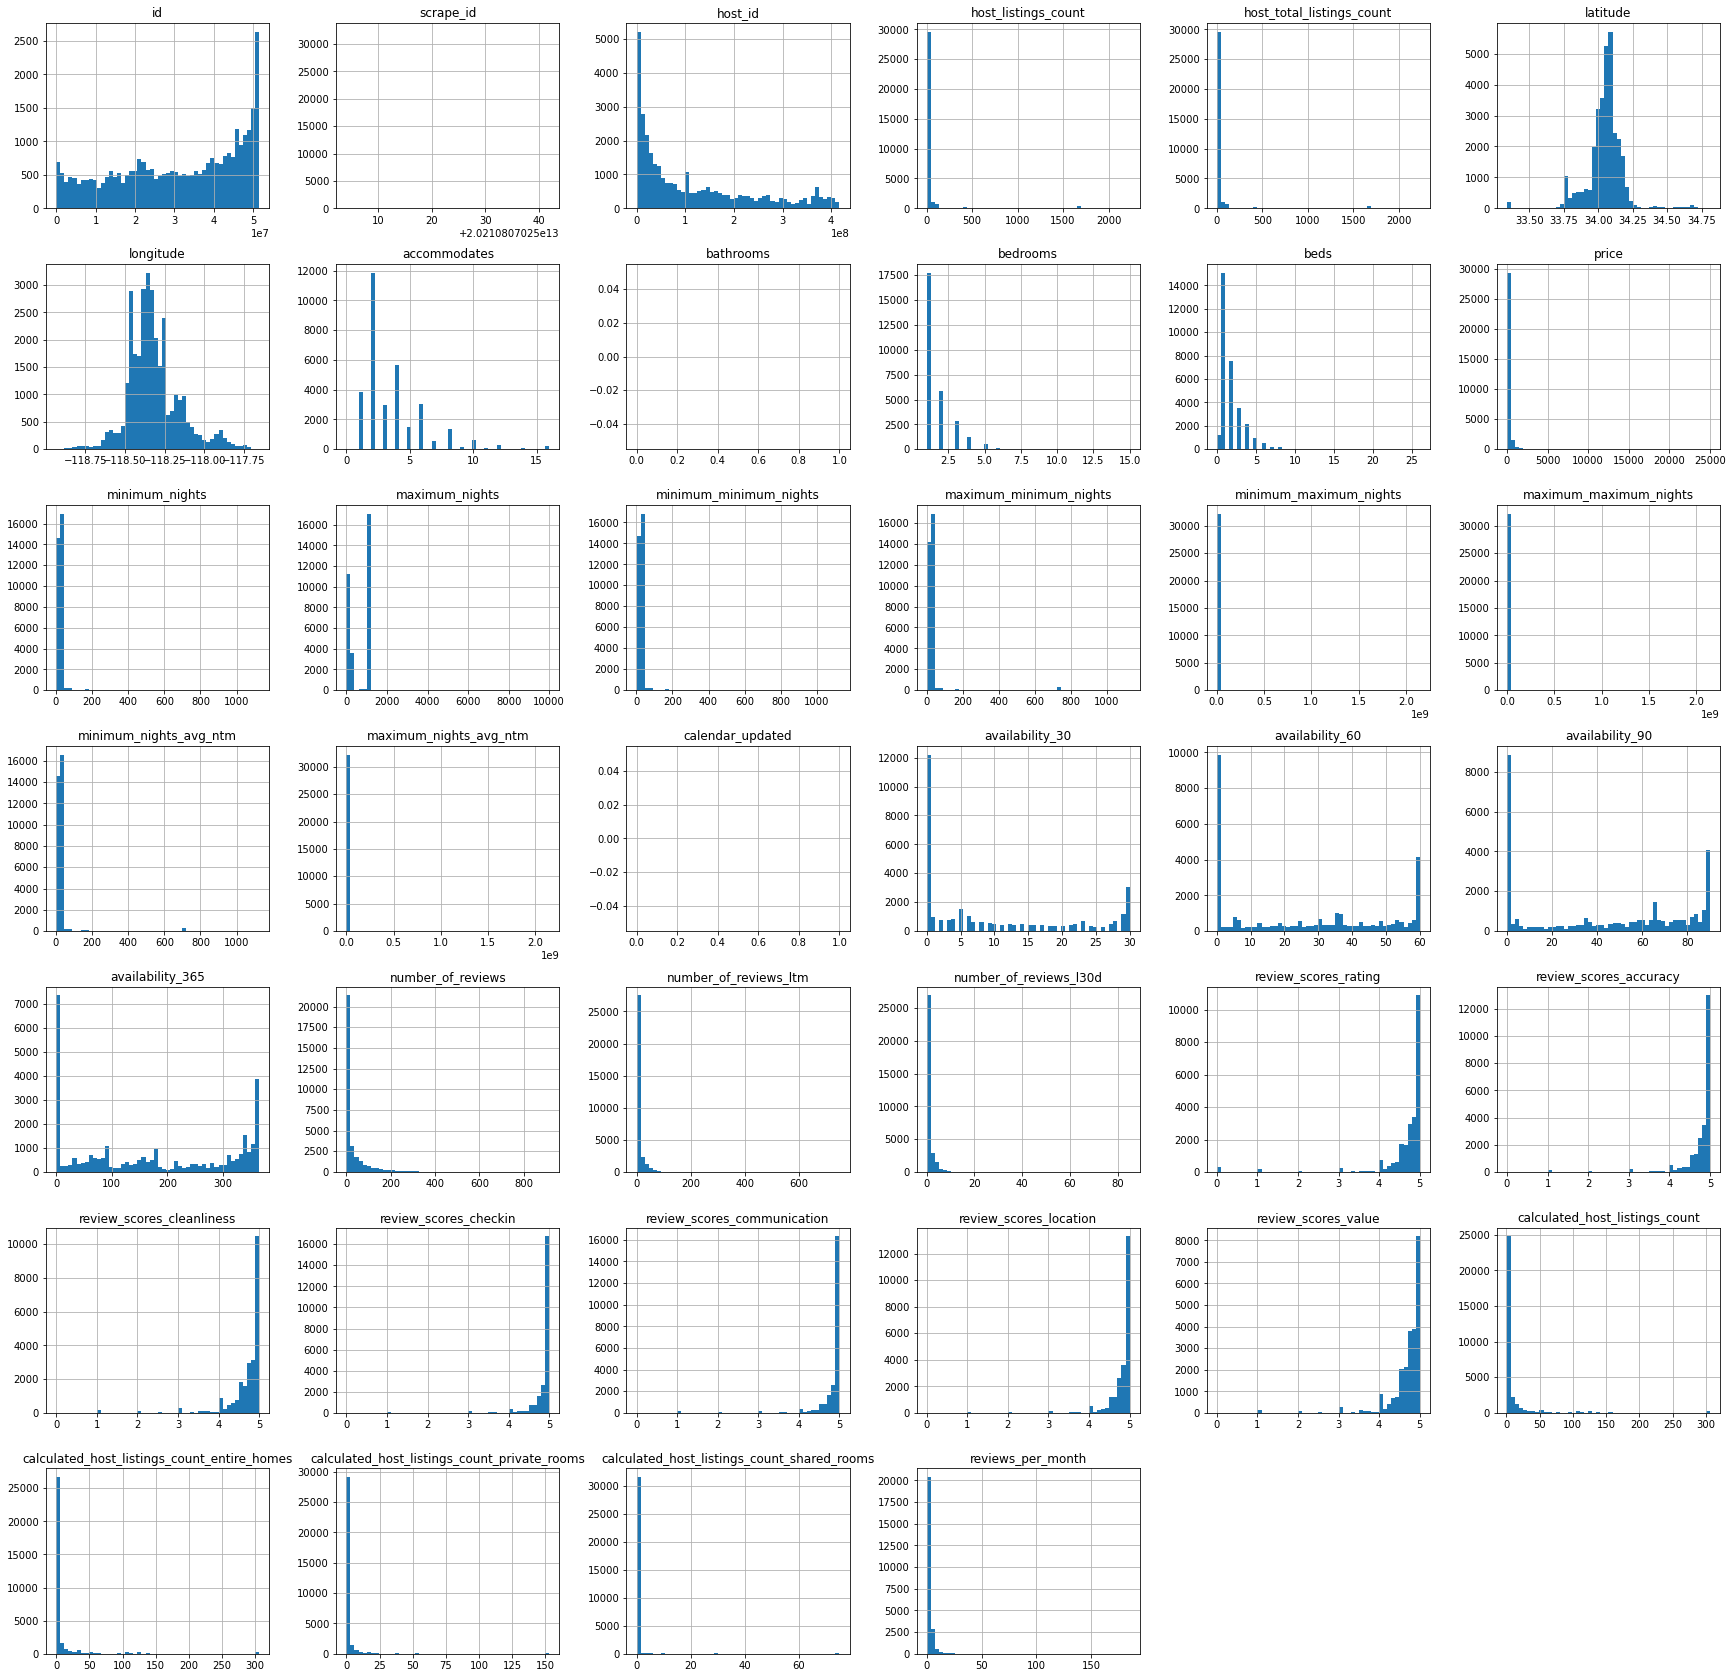

In [569]:
Airbnb_data.hist(bins=50, figsize=(30,30))
plt.show()

In [570]:
Airbnb_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

### Variables que vamos a ocupar:

In [571]:
new_Airbnb_data= Airbnb_data[['listing_url','name','description','neighborhood_overview', 
                          'picture_url','host_location', 'host_about','host_response_time', 'host_response_rate',
                          'host_acceptance_rate','host_is_superhost','host_picture_url','host_neighbourhood',
                          'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed','latitude',
                          'longitude', 'property_type', 'room_type', 'accommodates', 
                          'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','first_review','last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value',
                          'reviews_per_month'
                         ]]
print("Número de variables: ",len(new_Airbnb_data.columns))

Número de variables:  40


In [572]:
new_Airbnb_data.head()

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,https://www.airbnb.com/rooms/109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,...,2011-08-15,2016-05-15,4.00,5.00,5.00,3.00,4.00,5.00,4.00,0.02
1,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,100%,100%,...,2017-12-29,2021-06-19,4.84,4.77,4.90,5.00,4.97,5.00,4.84,0.71
2,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,100%,36%,...,2017-01-13,2019-12-27,4.68,4.45,4.57,4.65,4.70,4.90,4.40,0.38
3,https://www.airbnb.com/rooms/2864,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,"Bellflower, California, United States","Fair, open, honest and very informative for ne...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",within a few hours,100%,25%,...,2017-01-03,2018-10-31,4.04,4.04,3.83,3.96,4.30,4.64,4.00,0.41


<AxesSubplot:>

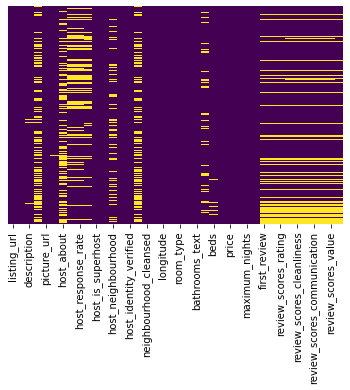

In [573]:
sns.heatmap(new_Airbnb_data.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [574]:
print("total de datos", new_Airbnb_data.shape[0], "\n")
print([new_Airbnb_data.isnull().sum()])

total de datos 32240 

[listing_url                        0
name                               2
description                     1158
neighborhood_overview          12451
picture_url                        0
host_location                    114
host_about                     12873
host_response_time              8602
host_response_rate              8602
host_acceptance_rate            8401
host_is_superhost                 41
host_picture_url                  41
host_neighbourhood              6296
host_has_profile_pic              41
host_identity_verified            41
neighbourhood                  12450
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                    58
bedrooms                        3709
beds                             638
amenities                          0
price         

# neighbourhood <a class="anchor" id="neighbourhood"></a>

In [241]:
print("\ntotal de valores nulos en Neighbourhood: ",new_Airbnb_data['neighbourhood'].isnull().sum())
print("\ntotal de valores nulos en latitude: ",new_Airbnb_data['latitude'].isnull().sum())
print("\ntotal de valores nulos en longitude: ",new_Airbnb_data['longitude'].isnull().sum())


total de valores nulos en Neighbourhood:  12450

total de valores nulos en latitude:  0

total de valores nulos en longitude:  0


In [104]:
new_Airbnb_data['neighbourhood'][11:17]

11                                       NaN
12                                       NaN
13    Los Angeles, California, United States
14                                       NaN
15                                       NaN
16         Venice, California, United States
Name: neighbourhood, dtype: object

In [108]:
pd.DataFrame(new_Airbnb_data.groupby('neighbourhood').size()).index.tolist()

[' Los Angeles, California, United States',
 ' walnut, California, United States',
 'Acton, California, United States',
 'Agoura Hills, California, United States',
 'Agua Dulce, California, United States',
 'Alhambra, California, United States',
 'Altadena , California, United States',
 'Altadena, California, United States',
 'Arcadia , California, United States',
 'Arcadia, California, United States',
 'Artesia, California, United States',
 'Avalon, California, United States',
 'Avocado Heights, California, United States',
 'Azusa , California, United States',
 'Azusa, California, United States',
 'Baldwin Park, California, United States',
 'Baldwin park, California, United States',
 'Bell Gardens, California, United States',
 'Bell, California, United States',
 'Bellflower, California, United States',
 'Beverly Hills , California, United States',
 'Beverly Hills, Ca, United States',
 'Beverly Hills, California, United States',
 'Beverly Hills/ Los Angeles, California, United States',

<div class = "alert alert-danger">
    <h3>Notas:</h3>
<br>    
No todos los host pusieron su dirección y hay muchos ruido en esos datos, por ejemplo, tenemos la misma ciudad escrita de diferentes formas, o con errores ortográficos
<br>  
Sin embargo, tenemos todos los datos geográficos
</div>

### Limpieza de datos  <a class="anchor" id="limpieza_datos"></a>

In [25]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
# initialize Nominatim API 
geolocator = Nominatim(user_agent="GeopyPY")

In [26]:
def obtain_neighbourhood(latitude,longitude):
    latitude= str(latitude)
    longitude = str(longitude)
    location = geolocator.reverse(latitude+","+longitude)
    address=location.raw['address']
    town = address.get('town', '')
    city = address.get('city','')
    state = address.get('state', '')
    country = address.get('country', '')
    code = address.get('country_code')
    zipcode = address.get('postcode')
    if city == '':
        answer = town
    else:
        answer = city
    return answer

In [27]:
#ejemplo 
lat = new_Airbnb_data[["latitude","longitude"]]["latitude"]
lon = new_Airbnb_data[["latitude","longitude"]]["longitude"]
print(obtain_neighbourhood(str(lat[2]), str(lon[2])))
print(obtain_neighbourhood(str(lat[0]), str(lon[0])))

Santa Monica
Culver City


In [28]:
def make_df(particion_size=403, size=32240):
    particiones = []
    p0 = 0;
    dfs = []
    df = new_Airbnb_data[["latitude","longitude"]]
    while((p0+particion_size)<=32240):
        #dfs.append(df[p0:p0+particion_size])
        #print("[",p0,":",p0+particion_size,"]")
        dfs.append(df[p0:p0+particion_size])
        p0 = p0+particion_size
    return dfs

In [29]:
#creamos nuestra particion del dataframe original
dfs = make_df(particion_size=403, size=32240)
len(dfs)

80

In [30]:
def apply_geopy(df,obtain_neighbourhood):
    df["correct_neighbourhood"] = df[["latitude","longitude"]].apply(lambda x : obtain_neighbourhood(*x), axis=1)
    return df

In [31]:
# en esta lista vamos a guardar las particiones
dfs_correct_neighbourhood = []

In [47]:
#para cada particion hacemos un request al API
import timeit
start = timeit.default_timer()
dfs_correct_neighbourhood.append(apply_geopy(dfs[],obtain_neighbourhood)) 
stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  6.217900227056816e-05


In [45]:
#verificamos cuántas llamadas pudimos hacer 
len(dfs_correct_neighbourhood)

6

In [46]:
def save_csv(lista_dfs):
    for i in range(len(lista_dfs)):
        name = "grupo"+str(i+74)
        lista_dfs[i].to_csv(name+".csv", index = False)

#guardamos en disco nuestros dataframes resultantes        
save_csv(dfs_correct_neighbourhood)

Cargamos los archivos y juntamos los dataframes en uno solo para poder agregar la columna con los neighbourhoods completos

In [52]:
def cargar_dfs():
    dfs = []
    for i in range(74,80):
        dfs.append(pd.read_csv("grupo"+str(i)+".csv"))
    return dfs

In [53]:
#cargamos los dataframes
dataframes = cargar_dfs()

In [54]:
# vemos cuántos dataframes tenemos cargados
len(dataframes)

6

In [62]:
def merge_dataframes(df_to_append,df_pivot):
    df_res = df_pivot.append(df_to_append)
    return df_res

def final_df(dataframes):
    df_pivot = dataframes[0]
    for i in range(1,6):
        df_pivot = merge_dataframes(df_to_append=dataframes[i],df_pivot=df_pivot)
    return df_pivot

In [63]:
Airbnb_data_neighbourhood_1= final_df(dataframes)

In [80]:
# creamos un dataframe con todos los dataframes que obtuvimos
Airbnb_data_neighbourhood=final_df(dataframes)

In [64]:
#lo guardamos para no perder lo que hicimos
Airbnb_data_neighbourhood_1.to_csv("LosAngeles/Airbnb_data_neighbourhood_1.csv")

In [242]:
Airbnb_data_neighbourhood = pd.read_csv('LosAngeles/Airbnb_data_neighbourhood.csv')

In [243]:
Airbnb_data_neighbourhood_1 = pd.read_csv('LosAngeles/Airbnb_data_neighbourhood_1.csv')

In [244]:
Airbnb_data_neighbourhood = Airbnb_data_neighbourhood.append(Airbnb_data_neighbourhood_1)

In [575]:
Airbnb_data_neighbourhood.to_csv("LosAngeles/Airbnb_data_neighbourhood_final.csv")

In [576]:
Airbnb_data_neighbourhood

,Unnamed: 0,latitude,longitude,correct_neighbourhood
0,0,33.982090,-118.384940,Culver City
1,1,34.097680,-118.346020,Los Angeles
2,2,34.004400,-118.480950,Santa Monica
3,3,33.876190,-118.113970,Bellflower
4,4,34.111320,-118.382270,Los Angeles
...,...,...,...,...
2413,398,34.051235,-118.242780,Los Angeles
2414,399,34.107436,-118.299250,Los Angeles
2415,400,34.081900,-118.363189,Los Angeles
2416,401,34.060280,-118.442377,Los Angeles


#### Pruebas:

In [74]:
#new_Airbnb_data_temp = new_Airbnb_data[0:29822] #hasta ahora la API solo nos da estos datos
new_Airbnb_data_temp_N = new_Airbnb_data[["latitude","longitude","neighbourhood"]]
new_Airbnb_data_temp_N["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values

/tmp/ipykernel_27598/673676552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Airbnb_data_temp_N["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values


In [76]:
# Resultado
new_Airbnb_data_temp_N

,latitude,longitude,neighbourhood,correct_neighbourhood
32235,34.051235,-118.242780,"Los Angeles, California, United States",Los Angeles
32236,34.107436,-118.299250,"Los Angeles, California, United States",Los Angeles
32237,34.081900,-118.363189,NaN,Los Angeles
32238,34.060280,-118.442377,"Los Angeles, California, United States",Los Angeles
32239,34.062277,-118.444261,"Los Angeles, California, United States",Los Angeles


help: https://stackoverflow.com/questions/27914648/geopy-catch-timeout-error

Obtenemos el resultado final con el dataframe original para analizar los datos

In [577]:
new_Airbnb_data["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values

/tmp/ipykernel_27598/1916626475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Airbnb_data["correct_neighbourhood"] = Airbnb_data_neighbourhood["correct_neighbourhood"].values


In [578]:
# algunos de los valores no los pudimos obtener con la API
print("\ntotal de valores nulos en correct_neighbourhood: ",new_Airbnb_data['correct_neighbourhood'].isnull().sum())
print("\ntotal de valores nulos en neighbourhood: ",new_Airbnb_data['neighbourhood'].isnull().sum())
new_Airbnb_data[["neighbourhood","correct_neighbourhood"]]


total de valores nulos en correct_neighbourhood:  1802

total de valores nulos en neighbourhood:  12450


,neighbourhood,correct_neighbourhood
0,NaN,Culver City
1,"Los Angeles, California, United States",Los Angeles
2,"Santa Monica, California, United States",Santa Monica
3,"Bellflower, California, United States",Bellflower
4,"Los Angeles, California, United States",Los Angeles
...,...,...
32235,"Los Angeles, California, United States",Los Angeles
32236,"Los Angeles, California, United States",Los Angeles
32237,NaN,Los Angeles
32238,"Los Angeles, California, United States",Los Angeles


In [579]:
# omitimos los valores nulos
new_Airbnb_data = new_Airbnb_data[~new_Airbnb_data.correct_neighbourhood.isnull()]

In [580]:
new_Airbnb_data.shape

(30438, 41)

In [251]:
new_Airbnb_data.to_csv("LosAngeles/new_Airbnb_data_neighbourhood.csv")

In [581]:
# ya categorizamos correctamente las ciudades
city_counts = pd.DataFrame(new_Airbnb_data.groupby(['correct_neighbourhood']).size())
city_counts.columns=["size"]
#team.columns =['Name', 'Code', 'Age', 'Weight']
city_counts

,size
correct_neighbourhood,
Agoura Hills,44
Alhambra,318
Altadena,170
Arcadia,180
Artesia,13
...,...
Walnut,77
West Covina,133
West Hollywood,832


In [253]:
#city_counts["correct_neighbourhood"] = city_counts.index.values
#city_counts.insert (3, “Sold in Bulk”, sold_in_bulk)
city_counts.insert(0,"correct_neighbourhood",list(city_counts.index.values))
#
#city_counts
#city_counts.set_index( [ pd.Index( [range(0,84)]),  'correct_neighbourhood' ])
#city_counts.set_index([pd.Index(), 'correct_neighbourhood'])
#s = pd.Series(list(range(0,84)))
#city_counts.set_index([s])


In [254]:
city_counts = city_counts.sort_values(by=['size'])
s = pd.Series(list(range(0,84)))
city_counts=city_counts.set_index([s])

In [255]:
city_counts.tail(10)

,correct_neighbourhood,size
74,Burbank,375
75,Pasadena,476
76,Inglewood,485
77,Beverly Hills,588
78,Glendale,598
79,El Monte,672
80,West Hollywood,832
81,Santa Monica,1105
82,Long Beach,1334
83,Los Angeles,17904


In [256]:
pd.DataFrame(new_Airbnb_data.groupby('correct_neighbourhood').size()).index

Index(['Agoura Hills', 'Alhambra', 'Altadena', 'Arcadia', 'Artesia', 'Avalon',
       'Azusa', 'Baldwin Park', 'Bell', 'Bell Gardens', 'Bellflower',
       'Beverly Hills', 'Burbank', 'Calabasas', 'Carson', 'Cerritos',
       'Claremont', 'Commerce', 'Compton', 'Covina', 'Cudahy', 'Culver City',
       'Cypress', 'Diamond Bar', 'Downey', 'Duarte', 'El Monte', 'El Segundo',
       'Gardena', 'Glendale', 'Glendora', 'Hawaiian Gardens', 'Hawthorne',
       'Hermosa Beach', 'Huntington Park', 'Inglewood', 'La Cañada Flintridge',
       'La Habra', 'La Mirada', 'La Puente', 'La Verne', 'Lake Los Angeles',
       'Lakewood', 'Lancaster', 'Lawndale', 'Lomita', 'Long Beach',
       'Los Angeles', 'Lynwood', 'Malibu', 'Manhattan Beach', 'Maywood',
       'Monrovia', 'Montebello', 'Monterey Park', 'Norwalk', 'Palmdale',
       'Paramount', 'Pasadena', 'Pico Rivera', 'Pomona', 'Quartz Hill',
       'Rancho Palos Verdes', 'Redondo Beach', 'Rosemead', 'San Dimas',
       'San Fernando', 'San Gabrie

In [257]:
property_type = pd.DataFrame(new_Airbnb_data.groupby(['property_type'],as_index=False).size())
property_type = property_type.sort_values(by=['size'])
property_type

,property_type,size
48,Private room in island,1
22,Entire vacation home,1
28,Lighthouse,1
19,Entire resort,1
38,Private room in chalet,1
...,...,...
13,Entire guesthouse,1700
51,Private room in rental unit,2123
52,Private room in residential home,4108
18,Entire residential home,5511


In [258]:
property_type.tail(10)

,property_type,size
39,Private room in condominium (condo),543
20,Entire serviced apartment,558
7,Entire bungalow,583
12,Entire guest suite,985
10,Entire condominium (condo),1516
13,Entire guesthouse,1700
51,Private room in rental unit,2123
52,Private room in residential home,4108
18,Entire residential home,5511
17,Entire rental unit,7819


In [259]:
room_type = pd.DataFrame(new_Airbnb_data.groupby(['room_type'],as_index=False).size())
room_type = room_type.sort_values(by=['size'])
room_type

,room_type,size
1,Hotel room,112
3,Shared room,920
2,Private room,8846
0,Entire home/apt,20560


In [260]:
property_type.head(10)

,property_type,size
48,Private room in island,1
22,Entire vacation home,1
28,Lighthouse,1
19,Entire resort,1
38,Private room in chalet,1
50,Private room in minsu,1
60,Private room in yurt,1
61,Religious building,1
63,Room in bed and breakfast,1
26,Hotel room,1


In [474]:
accomodates = pd.DataFrame(new_Airbnb_data.groupby(['accommodates'],as_index=False).size())
accomodates = accomodates.sort_values(by=['size'])
accomodates.tail()

,accommodates,size
5,6,2790
2,3,2859
0,1,3668
3,4,5339
1,2,11171


In [485]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='host_identity_verified', ylabel='Count'>

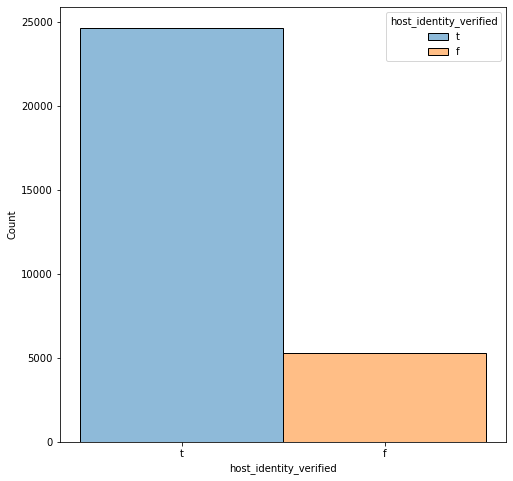

In [500]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 8)
#sns.histplot(data=new_Airbnb_data, x='host_identity_verified',palette = sns.color_palette("tab10"),alpha = 1,shrink=.8)
sns.histplot(data=new_Airbnb_data, x="host_identity_verified", hue="host_identity_verified")

In [262]:
new_Airbnb_data[['review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value',
                          'reviews_per_month'
                         ]].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,22801.000000,22464.000000,22465.000000,22455.000000,22463.000000,22452.000000,22450.000000,22801.000000
mean,4.662888,4.774235,4.696864,4.848140,4.831774,4.804626,4.679065,2.036264
std,0.723435,0.469105,0.507653,0.411609,0.441945,0.399440,0.496242,4.313956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4.660000,4.750000,4.630000,4.870000,4.850000,4.770000,4.610000,0.230000
50%,4.870000,4.920000,4.860000,4.970000,4.970000,4.920000,4.810000,0.860000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.960000,2.480000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,185.000000


In [263]:
new_Airbnb_data[[ 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews'
                         ]].describe()

,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
count,26890.000000,29834.000000,30438.000000,30438.000000,30438.000000,30438.000000
mean,1.661770,1.952671,266.951344,20.851239,667.452034,33.642454
std,1.080301,1.534366,742.375210,31.281302,505.938241,67.872074
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,76.000000,2.000000,90.000000,0.000000
50%,1.000000,1.000000,125.000000,30.000000,1125.000000,5.000000
75%,2.000000,2.000000,225.000000,30.000000,1125.000000,34.000000
max,15.000000,26.000000,25000.000000,1125.000000,10000.000000,915.000000


In [355]:
new_Airbnb_data["correct_neighbourhood"].value_counts().idxmax()

'Los Angeles'

In [264]:
bathrooms = pd.DataFrame(new_Airbnb_data.groupby(['bedrooms'],as_index=False).size())
bathrooms = bathrooms.sort_values(by=['size'])
bathrooms

,bedrooms,size
10,11.0,1
12,13.0,1
13,15.0,1
11,12.0,2
9,10.0,4
8,9.0,9
7,8.0,19
6,7.0,60
5,6.0,157
4,5.0,479


In [ ]:
new_Airbnb_data[]

In [265]:
new_Airbnb_data[[ 'host_response_rate','host_acceptance_rate']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30438 entries, 0 to 32239
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   host_response_rate    22271 non-null  object
 1   host_acceptance_rate  22449 non-null  object
dtypes: object(2)
memory usage: 713.4+ KB


In [582]:
# cambiar tipo de dato a numero entre 0 y 1
new_Airbnb_data[[ 'host_response_rate','host_acceptance_rate']]

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100%,100%
2,100%,36%
3,NaN,NaN
4,100%,25%
...,...,...
32235,70%,62%
32236,70%,62%
32237,94%,87%
32238,100%,99%


In [583]:
def remove_porc(num):
    num = str(num).replace("%","")
    return float(num)

def convert_decimal(num):
    num = float(num)/100
    return num

In [584]:
serie = new_Airbnb_data.host_response_rate.apply(remove_porc)
new_Airbnb_data["host_response_rate"] = serie

In [585]:
serie2 = new_Airbnb_data.host_response_rate.apply(convert_decimal)
new_Airbnb_data["host_response_rate"] = serie2

In [586]:
serie = new_Airbnb_data.host_response_rate.apply(remove_porc)
new_Airbnb_data["host_acceptance_rate"] = serie
serie2 = new_Airbnb_data.host_response_rate.apply(convert_decimal)
new_Airbnb_data["host_acceptance_rate"] = serie2

In [587]:
new_Airbnb_data[["host_response_rate","host_acceptance_rate"]]

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,1.00,0.0100
2,1.00,0.0100
3,NaN,NaN
4,1.00,0.0100
...,...,...
32235,0.70,0.0070
32236,0.70,0.0070
32237,0.94,0.0094
32238,1.00,0.0100


In [588]:
print("\ntotal de valores nulos en host_response_rate: ",new_Airbnb_data['host_response_rate'].isnull().sum())
#pd.to_numeric(new_Airbnb_data['host_response_rate'])
print("\ntotal de valores nulos en host_acceptance_rate: ",new_Airbnb_data['host_acceptance_rate'].isnull().sum())


total de valores nulos en host_response_rate:  8167

total de valores nulos en host_acceptance_rate:  8167


In [589]:
new_Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30438 entries, 0 to 32239
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  30438 non-null  object 
 1   name                         30436 non-null  object 
 2   description                  29376 non-null  object 
 3   neighborhood_overview        18640 non-null  object 
 4   picture_url                  30438 non-null  object 
 5   host_location                30332 non-null  object 
 6   host_about                   18313 non-null  object 
 7   host_response_time           22271 non-null  object 
 8   host_response_rate           22271 non-null  float64
 9   host_acceptance_rate         22271 non-null  float64
 10  host_is_superhost            30399 non-null  object 
 11  host_picture_url             30399 non-null  object 
 12  host_neighbourhood           25086 non-null  object 
 13  host_has_profile

# EDA con la variable neighbourhood  <a class="anchor" id="eda_neighborhood"></a>

In [280]:
#sns.countplot(x="correct_neighbourhood",data=new_Airbnb_data_temp)
new_Airbnb_data["correct_neighbourhood"].describe()

count           30438
unique             84
top       Los Angeles
freq            17904
Name: correct_neighbourhood, dtype: object

# neighborhood_overview <a class="anchor" id="neighborhood_overview"></a>

In [283]:
#consideramos solo los datos que no tienen nulos en la variable neighborhood_overview
Airbnb_data_neighbourhood_overview = new_Airbnb_data[~new_Airbnb_data.neighborhood_overview.isnull()].head(2)
Airbnb_data_neighbourhood_overview

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,correct_neighbourhood
1,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,1.0,0.01,...,2021-06-19,4.84,4.77,4.90,5.00,4.97,5.0,4.84,0.71,Los Angeles
2,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,1.0,0.01,...,2019-12-27,4.68,4.45,4.57,4.65,4.70,4.9,4.40,0.38,Santa Monica


¿Cuál es el promedio de los review scores?

In [284]:
print(f"Average review_scores_value: {new_Airbnb_data[~new_Airbnb_data.review_scores_value.isnull()].review_scores_value.mean():.1f}")

Average review_scores_value: 4.7


# host_identity_verified <a class="anchor" id="host_identity_verified"></a>

In [285]:
verified_count = new_Airbnb_data.groupby('host_identity_verified')['host_identity_verified'].count()
verified_count

host_identity_verified
f     5351
t    25048
Name: host_identity_verified, dtype: int64

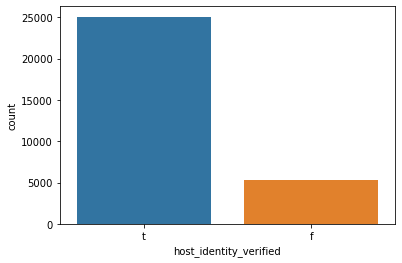

In [286]:
# distribution
sns.countplot(x='host_identity_verified', data=new_Airbnb_data)
plt.show()

# price <a class="anchor" id="price"></a>

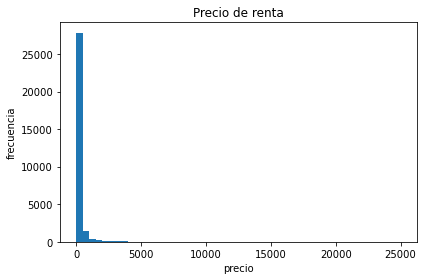

In [294]:
# view a histogram of the prices
fig, ax = plt.subplots()
n, bins, patches = ax.hist(new_Airbnb_data.price, 50)
ax.set_xlabel('precio')
ax.set_ylabel('frecuencia')
ax.set_title(r'Precio de renta')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [291]:
new_Airbnb_data.price.describe()

count    30438.000000
mean       266.951344
std        742.375210
min          0.000000
25%         76.000000
50%        125.000000
75%        225.000000
max      25000.000000
Name: price, dtype: float64

In [292]:
print("numero de datos con precio 25000:",len(new_Airbnb_data[(new_Airbnb_data.price == 25000)]))
print("numero de datos con precio 0:",len(new_Airbnb_data[(new_Airbnb_data.price == 0)]))
print("\n max price info:\n")
print(new_Airbnb_data[(new_Airbnb_data.price == 25000)].neighbourhood)
print("\n min price info:\n")
print(new_Airbnb_data[(new_Airbnb_data.price == 0)].neighbourhood)

numero de datos con precio 25000: 6
numero de datos con precio 0: 16

 max price info:

27668    NaN
27691    NaN
27692    NaN
27694    NaN
27695    NaN
27696    NaN
Name: neighbourhood, dtype: object

 min price info:

20265    NaN
20266    NaN
21031    NaN
21329    NaN
21330    NaN
21366    NaN
21427    NaN
21762    NaN
21763    NaN
21982    NaN
22106    NaN
22107    NaN
22108    NaN
22109    NaN
24944    NaN
24952    NaN
Name: neighbourhood, dtype: object


<div class = "alert alert-danger">
    <h3>Notas:</h3>
<br>    
<dl>
    <dt> El precio máximo es 25,000 </dt>
    <dd> - el número de datos con este precio son 6 </dd>
    <dd> - no hay un neighbourhood registrado para estos datos</dd>
    <dt>El precio mínimo 0 </dt>
    <dd> - no hay un neighbourhood registrado para estos datos</dd>
</dl>
</div>

,bins,frecuency
0,"[0.0,500.0)",27807.0
1,"[500.0,1000.0)",1490.0
2,"[1000.0,1500.0)",411.0
3,"[1500.0,2000.0)",254.0
4,"[2000.0,2500.0)",117.0


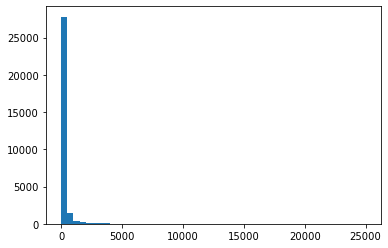

In [298]:
# obtain more info from bins of histogram
def bins_info(patches):
    C  = []
    for i in range(0,len(patches)):
        C.append(patches[i].get_xy()[0])
    dic = {f"[{C[i]},{C[i+1]})": patches[i].get_height() for i in range(len(patches)-1)}
    dic[f"[{C[-1]},{C[-1]+patches[-1].get_width()})"]= patches[-1].get_height()
    return dic

fig, ax = plt.subplots()
n, bins, patches = ax.hist(new_Airbnb_data.price, 50)
p = ax.patches
C = bins_info(p)
pd.DataFrame(C.items(),columns = ['bins','frecuency']).head()

In [590]:
#Clean data
# if the price is less then 5 and greater than 2,000 revome it 
new_Airbnb_data = new_Airbnb_data[(new_Airbnb_data.price > 5) & (new_Airbnb_data.price <= 2000)]

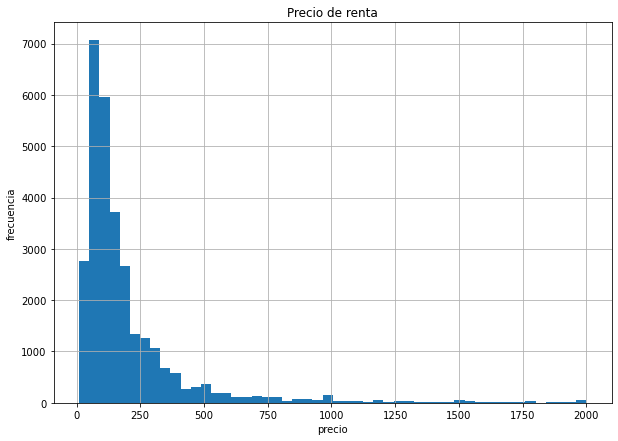

In [308]:
fig, ax = plt.subplots()
ax.set_xlabel('precio')
ax.set_ylabel('frecuencia')
ax.set_title(r'Precio de renta')
new_Airbnb_data.price.hist(bins=50, figsize=(10,7))
plt.show()

In [309]:
new_Airbnb_data.price.describe()

count    29983.000000
mean       201.129407
std        247.732654
min         10.000000
25%         75.000000
50%        124.000000
75%        217.000000
max       2000.000000
Name: price, dtype: float64

In [591]:
print("\ntotal de valores nulos en price: ",new_Airbnb_data['price'].isnull().sum())


total de valores nulos en price:  0


<AxesSubplot:xlabel='price', ylabel='Count'>

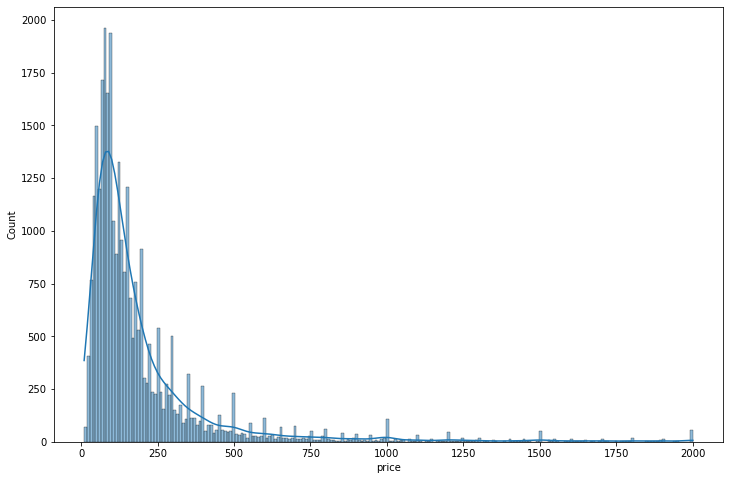

In [458]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.histplot(data=new_Airbnb_data, x="price", kde=True)

# Matriz de correlación

<AxesSubplot:>

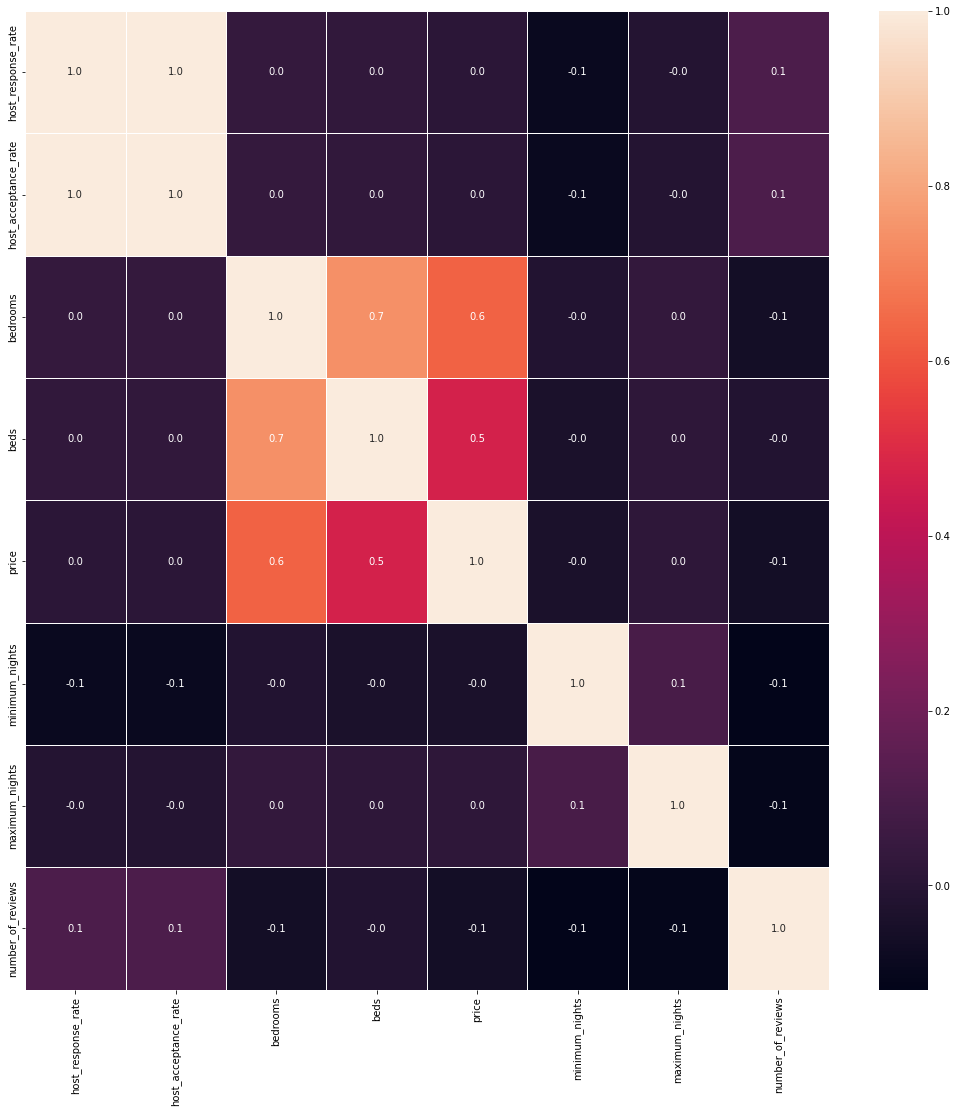

In [592]:

new_Airbnb_data1 = new_Airbnb_data[[ 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews'
                         ]]
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(new_Airbnb_data1.corr(), annot=True, linewidths = .5, fmt='.1f', ax = ax)

<AxesSubplot:>

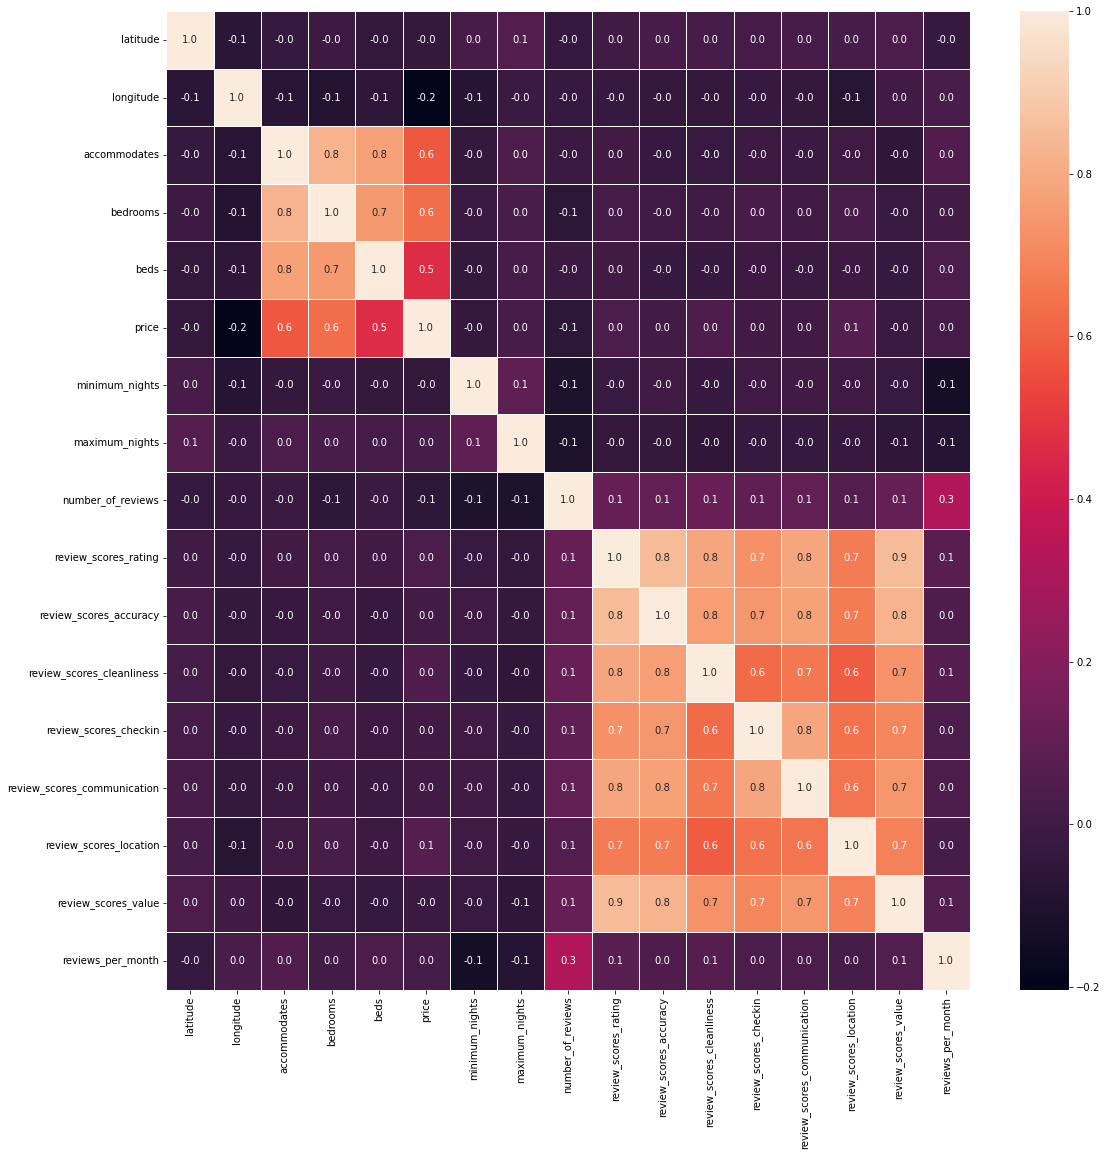

In [94]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(new_Airbnb_data1.corr(), annot=True, linewidths = .5, fmt='.1f', ax = ax)

In [310]:
new_Airbnb_data["host_identity_verified"].isnull().sum()

39

In [316]:
new_Airbnb_data_price = new_Airbnb_data[(new_Airbnb_data.price > 10) & (new_Airbnb_data.price <= 350)]

<AxesSubplot:xlabel='price', ylabel='host_is_superhost'>

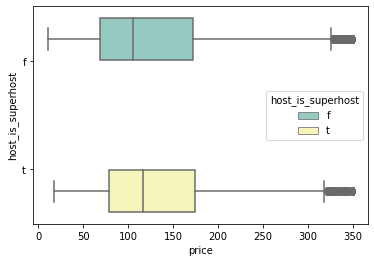

In [317]:
sns.boxplot(x = 'price', y = "host_is_superhost", data=new_Airbnb_data_price, hue="host_is_superhost",palette="Set3")

# Boxplots


<AxesSubplot:title={'center':'price'}, xlabel='host_identity_verified'>

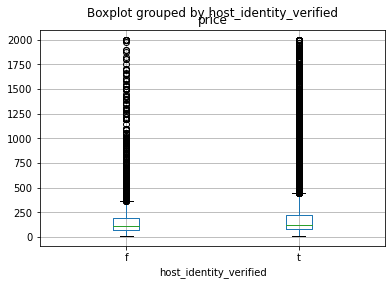

In [95]:
new_Airbnb_data.boxplot(column = 'price', by = 'host_identity_verified')

# Scatter

<AxesSubplot:xlabel='beds', ylabel='price'>

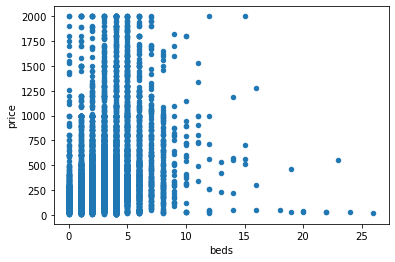

In [318]:
new_Airbnb_data.plot(kind = "scatter", x = "beds",y = "price")

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

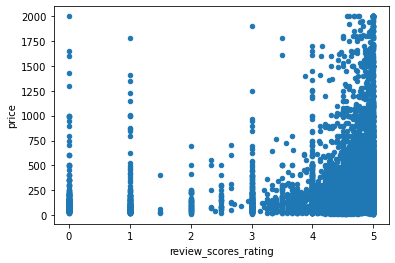

In [320]:
new_Airbnb_data.plot(kind = "scatter", x = "review_scores_rating", y= "price")

# Review_scores_rating

In [593]:
new_Airbnb_data["review_scores_rating"].isnull().sum()

7379

In [594]:
avg_review_rating = new_Airbnb_data["review_scores_rating"].mean(axis=0)
print("promedio de review_scores_rating:",avg_review_rating)

promedio de review_scores_rating: 4.663425057511981


In [595]:
new_Airbnb_data["review_scores_rating"].isnull().sum()

7379

### Replace NaN by mean value in review_scores_rating column

In [596]:
new_Airbnb_data["review_scores_rating"].replace(np.nan, avg_review_rating, inplace=True)

In [597]:
new_Airbnb_data["review_scores_rating"].isnull().sum()

0

In [598]:
#base de datos chida
new_Airbnb_data.to_csv("new_Airbnb_data_final.csv")

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

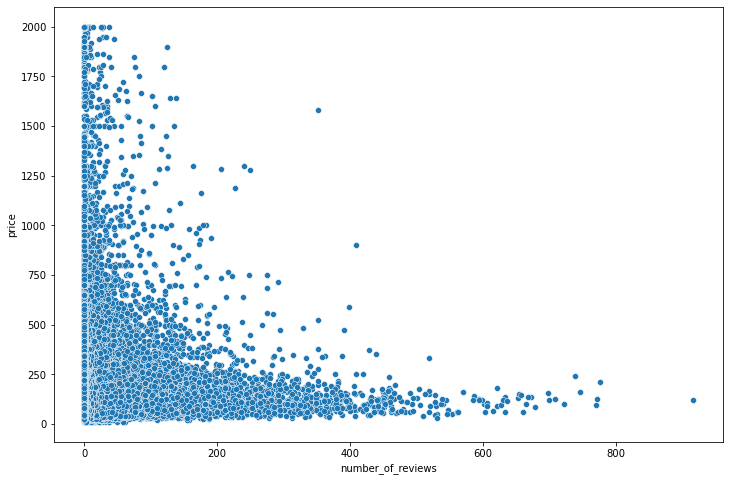

In [599]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="number_of_reviews", y="price")

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

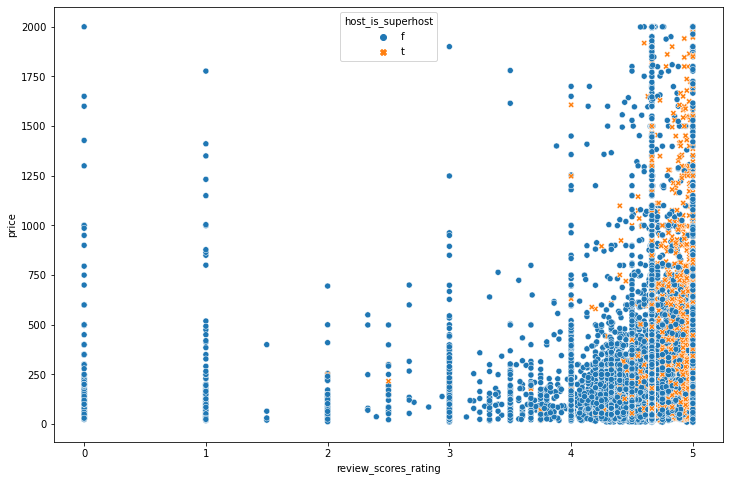

In [600]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="review_scores_rating", y="price", hue="host_is_superhost",style="host_is_superhost")

In [97]:
#import matplotlib.pyplot as plt
#new_Airbnb_data1.reviews_per_month.hist(bins=50, figsize=(10,7))
#plt.show()

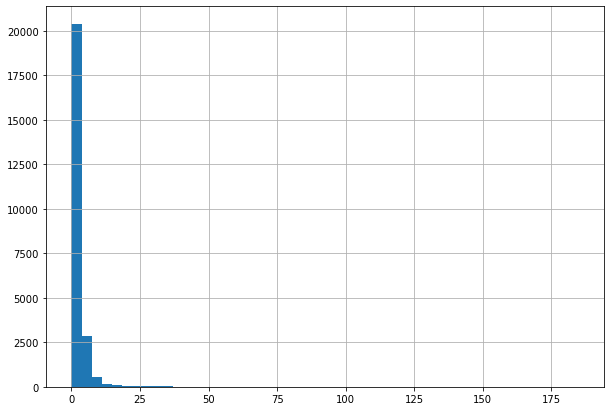

In [98]:
import matplotlib.pyplot as plt
Airbnb_data.reviews_per_month.hist(bins=50, figsize=(10,7))
plt.show()

In [398]:
new_Airbnb_data_dates = new_Airbnb_data.copy()
new_Airbnb_data_dates['calendar_last_scrape']="2021-08-07"
new_Airbnb_data_dates= new_Airbnb_data_dates[~new_Airbnb_data_dates.last_review.isnull()]
new_Airbnb_data_dates= new_Airbnb_data_dates[~new_Airbnb_data_dates.first_review.isnull()]

In [382]:
new_Airbnb_data_dates["first_review"]

0        2011-08-15
1        2017-12-29
2        2017-01-13
3        2017-01-03
4        2015-11-29
            ...    
22599    2021-08-01
22600    2021-08-06
22601    2021-08-02
22602    2021-08-03
22603    2021-08-05
Name: first_review, Length: 22604, dtype: object

In [361]:
from datetime import date, timedelta
current_date = date.today()
current_date
#Airbnb lanzada en 2008

datetime.date(2021, 9, 13)

In [394]:
def convert_date(dato):
    if(dato.find("/") > 0):
        l1 =str(dato).split("/")
        #l1.append('20'+l1.pop())
        #l2 = list(map(int,l1))
    else:
        l1 =str(dato).split("-")
        #l1.append('20'+l1.pop())
        #l2 = list(map(int,l1))
    year = int(l1[0])
    month=int(l1[1])
    day = int(l1[2])
    return date(year, month,day)

In [395]:
"07-08-2021".find("/")# esta es la fecha de ultima scrape
convert_date("2021-08-05")

datetime.date(2021, 8, 5)

In [396]:
def convert_to_date(dato):
    dato = dato.replace("days, 0:00:00","").strip()
    dato = dato.replace("day, 0:00:00","").strip()
    dato = dato.replace('0:00:00',"0").strip()
    #dato = dato.replace("''","").strip()
    #dato = dato.replace("day, 0:00:00","").strip()
    return int(dato)

def antiguedad(first_review,last_scrape):
    last_scrape= convert_date(last_scrape)
    first_review=convert_date(first_review)
    dato = last_scrape-first_review
    dato = convert_to_date(str(dato))
    return dato

def dias_transcurridos_last_review(last_review,last_scrape):
    last_scrape= convert_date(last_scrape)
    last_review=convert_date(last_review)
    dato = last_scrape-last_review
    dato = convert_to_date(str(dato))
    return dato

In [399]:
print(antiguedad("2015-11-29","2021-08-07"))
#print(dias_transcurridos_last_review("15/05/16","07/08/21"))

2078


In [366]:
print(new_Airbnb_data_dates.shape)
#ver los index del dataframe
#print([new_Airbnb_data3.index])
#new_Airbnb_data3.set_index()

(22604, 42)


In [400]:
#s = pd.Series( range(0, 22604, 1) )
#new_Airbnb_data_dates.set_index([s], inplace = True)
#print(type(range(0, 24064, 1)))
#len(list(range(0, 24064, 1)))
#new_Airbnb_data_dates[""]
new_Airbnb_data_dates=new_Airbnb_data_dates.copy()

In [401]:
first_review = list(new_Airbnb_data_dates.first_review)
#first_review
antiguedad_relativa=list(map(lambda x:antiguedad(x,last_scrape ="2021-08-07"),first_review))
df_ant_rel = pd.DataFrame(antiguedad_relativa,columns=['days_of_relative_antiquity'])

#cambiar tipo de dato
#df_ant_rel["relative_antiquity"]=df_ant_rel.relative_antiquity

#preguntar si tenemos variables nulas
print([df_ant_rel.isnull().sum()])
#tamaño del dataframe
print(df_ant_rel.shape)

[days_of_relative_antiquity    0
dtype: int64]
(22604, 1)


In [406]:
last_review = list(new_Airbnb_data_dates.last_review)
days_past_from_lastreview=list(map(lambda x:dias_transcurridos_last_review(x,last_scrape ="2021-08-07"),last_review))
df_last_rev = pd.DataFrame(days_past_from_lastreview,columns=['days_past_from_lastreview'])

#cambiar tipo de dato
#df_last_rev.days_past_from_lastreview=df_last_rev.days_past_from_lastreview.astype(str)

#preguntar si tenemos variables nulas
print(df_last_rev.isnull().sum())
#tamaño del dataframe
print(df_last_rev.shape)

days_past_from_lastreview    0
dtype: int64
(22604, 1)


In [407]:
df_reviews_days=df_ant_rel.join(df_last_rev.days_past_from_lastreview)
#preguntar si tenemos variables nulas
print(df_reviews_days.isnull().sum())

days_of_relative_antiquity    0
days_past_from_lastreview     0
dtype: int64


In [408]:
df_reviews_days

,days_of_relative_antiquity,days_past_from_lastreview
0,3645,1910
1,1317,49
2,1667,589
3,1677,1011
4,2078,7
...,...,...
22599,6,6
22600,1,1
22601,5,5
22602,4,4


In [409]:
new_Airbnb_data_dates = new_Airbnb_data_dates.join(df_reviews_days)
new_Airbnb_data_dates

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,correct_neighbourhood,calendar_last_scrape,days_of_relative_antiquity,days_past_from_lastreview
0,https://www.airbnb.com/rooms/109,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,"San Francisco, California, United States","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",NaN,NaN,NaN,...,5.00,3.00,4.00,5.00,4.00,0.02,Culver City,2021-08-07,3645.0,1910.0
1,https://www.airbnb.com/rooms/2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,"Los Angeles, California, United States",Writer.\r\nLiterary Manager.\r\nPhotographer.\...,within an hour,1.00,0.0100,...,4.90,5.00,4.97,5.00,4.84,0.71,Los Angeles,2021-08-07,1317.0,49.0
2,https://www.airbnb.com/rooms/2732,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,"Santa Monica, California, United States",I have been teaching yoga and meditation for 3...,within an hour,1.00,0.0100,...,4.57,4.65,4.70,4.90,4.40,0.38,Santa Monica,2021-08-07,1667.0,589.0
4,https://www.airbnb.com/rooms/3021,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,"Los Angeles, California, United States","Music Industry, Record producer, Songwriter, C...",within a few hours,1.00,0.0100,...,3.83,3.96,4.30,4.64,4.00,0.41,Los Angeles,2021-08-07,2078.0,7.0
5,https://www.airbnb.com/rooms/5728,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,"Los Angeles, California, United States",we are loving our home and would like to share...,within a few hours,1.00,0.0100,...,4.85,4.91,4.92,4.79,4.70,4.49,Los Angeles,2021-08-07,1436.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31739,https://www.airbnb.com/rooms/51354730,Top left bunk shared space,<b>License number</b><br />NRP21-00102,NaN,https://a0.muscache.com/pictures/da6a63d1-d0bb...,"Long Beach, California, United States",NaN,within an hour,0.66,0.0066,...,5.00,5.00,5.00,5.00,5.00,1.00,Long Beach,2021-08-07,NaN,NaN
31770,https://www.airbnb.com/rooms/51367104,Cozy Home close to the Beach,This is a small but spacious house. If your lo...,This is a quiet but family oriented neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,US,NaN,within an hour,1.00,0.0100,...,5.00,5.00,5.00,5.00,5.00,1.00,Long Beach,2021-08-07,NaN,NaN
31772,https://www.airbnb.com/rooms/51367246,Amazing 2 Bedroom Suites in China Town,"ur apartments give you room to create, work, a...",Our apartment building near Downtown Los Angel...,https://a0.muscache.com/pictures/fc2051c5-44e5...,"California, United States","Everything we do is designed to give you, the ...",within an hour,0.97,0.0097,...,5.00,4.00,4.00,5.00,4.00,1.00,Los Angeles,2021-08-07,NaN,NaN
31868,https://www.airbnb.com/rooms/51404105,Cheerful 1- private Room with swimming pool,Come and enjoy the vacation,NaN,https://a0.muscache.com/pictures/79481123-cee5...,"Hacienda Heights, California, United States",I am a Teacher in Los Angles School District M...,within an hour,1.00,0.0100,...,5.00,5.00,5.00,5.00,5.00,1.00,El Monte,2021-08-07,NaN,NaN


In [410]:
new_Airbnb_data_dates.shape

(22604, 44)

In [442]:
new_Airbnb_data_dates[["number_of_reviews"]].describe()

,number_of_reviews
count,22604.000000
mean,45.210582
std,75.364748
min,1.000000
25%,3.000000
50%,14.000000
75%,53.000000
max,915.000000


In [443]:
new_Airbnb_data_dates[new_Airbnb_data_dates["number_of_reviews"]==915]

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,correct_neighbourhood,calendar_last_scrape,days_of_relative_antiquity,days_past_from_lastreview
1190,https://www.airbnb.com/rooms/1990543,Private 1906 Bungalow,Newly renovated and rustic 1906 Bungalow with ...,"Walking distance to Venice Beach, Shops, Resta...",https://a0.muscache.com/pictures/b12d69ec-02bb...,"Santa Monica, California, United States",I'm a professional musician and have lived in ...,within an hour,1.0,0.01,...,4.62,4.86,4.8,4.92,4.7,10.92,Santa Monica,2021-08-07,698.0,30.0


In [411]:
print(max(new_Airbnb_data_dates.days_of_relative_antiquity))
print(min(new_Airbnb_data_dates.days_of_relative_antiquity))
print(new_Airbnb_data_dates.days_of_relative_antiquity.describe())

4336.0
1.0
count    17837.000000
mean       971.803667
std        723.919197
min          1.000000
25%        390.000000
50%        833.000000
75%       1437.000000
max       4336.000000
Name: days_of_relative_antiquity, dtype: float64


<AxesSubplot:xlabel='price', ylabel='days_of_relative_antiquity'>

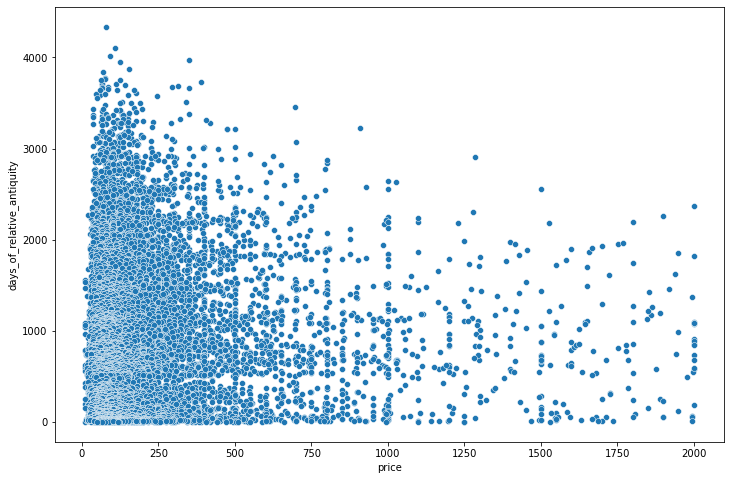

In [415]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data_dates, x="price", y="days_of_relative_antiquity")

<AxesSubplot:xlabel='price', ylabel='days_past_from_lastreview'>

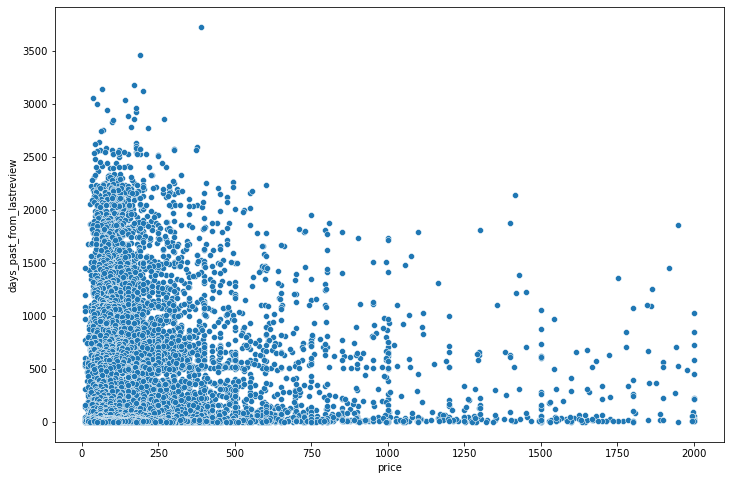

In [416]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data_dates, x="price", y="days_past_from_lastreview")

In [307]:
df_test = new_Airbnb_data3[['price', 'host_is_superhost']]
df_grp = df_test.groupby(['host_is_superhost'],as_index=True).mean()
df_grp

,price
host_is_superhost,
f,188.059692
t,199.297935


<AxesSubplot:xlabel='price', ylabel='days_of_relative_antiquity'>

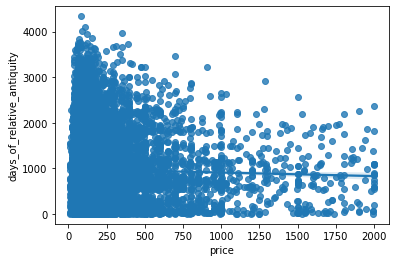

In [413]:
sns.regplot(x = "price",y = "days_of_relative_antiquity",data=new_Airbnb_data_dates)

In [310]:
new_Airbnb_data3[['price', 'host_is_superhost']].corr()

,price
price,1.0


<AxesSubplot:xlabel='price', ylabel='host_is_superhost'>

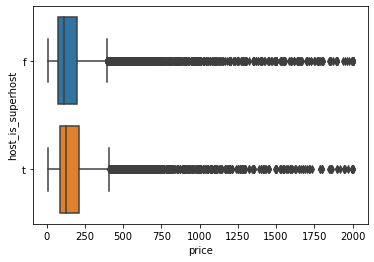

In [312]:
sns.boxplot(x = 'price', y = "host_is_superhost", data=new_Airbnb_data3)

In [370]:
#new_Airbnb_data3.info()
new_Airbnb_data.describe(include=['object'])

,listing_url,name,description,neighborhood_overview,picture_url,host_location,host_about,host_response_time,host_is_superhost,host_picture_url,...,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,first_review,last_review,correct_neighbourhood
count,29983,29981,29009,18461,29983,29879,18079,21909,29944,29944,...,29944,18461,29983,29983,29983,29944,29983,22604,22604,29983
unique,29983,28931,26796,15521,28625,929,9770,4,2,17074,...,2,270,242,97,4,39,27106,2858,2030,84
top,https://www.airbnb.com/rooms/109,Boutique Hostel,<b>License number</b><br />Exempt - This listi...,The neighborhood of Sherman Oaks is a very aff...,https://a0.muscache.com/pictures/b8f67b03-6e16...,"Los Angeles, California, United States",Why take a chance picking & choosing between s...,within an hour,f,https://a0.muscache.com/im/pictures/user/d0ad9...,...,t,"Los Angeles, California, United States",Venice,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",2021-05-31,2021-08-01,Los Angeles
freq,1,75,89,127,75,13189,302,14296,20894,302,...,24650,10124,1584,7806,20155,13447,82,65,681,17652


In [601]:
host_response_time_df = new_Airbnb_data["host_response_time"].value_counts().to_frame()
host_response_time_df.index.name = "time"
host_response_time_df

,host_response_time
time,
within an hour,14296
within a few hours,3968
within a day,2375
a few days or more,1270


<AxesSubplot:xlabel='host_response_time', ylabel='count'>

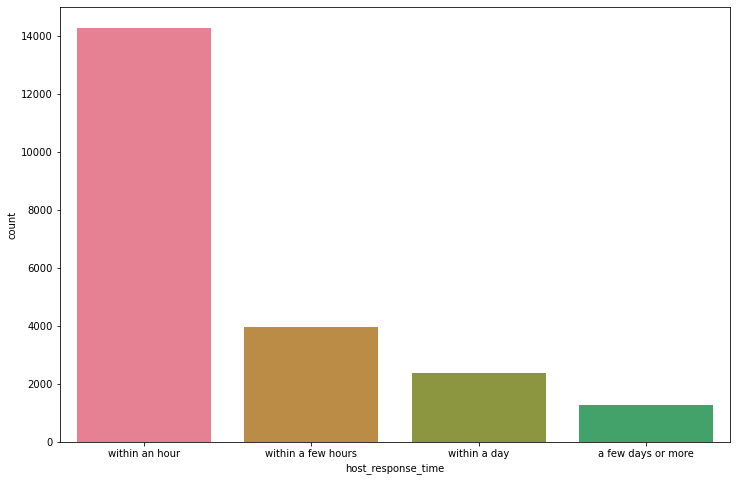

In [502]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.countplot(x="host_response_time",data = new_Airbnb_data,palette=sns.color_palette("husl", 8))

<AxesSubplot:xlabel='host_has_profile_pic', ylabel='Count'>

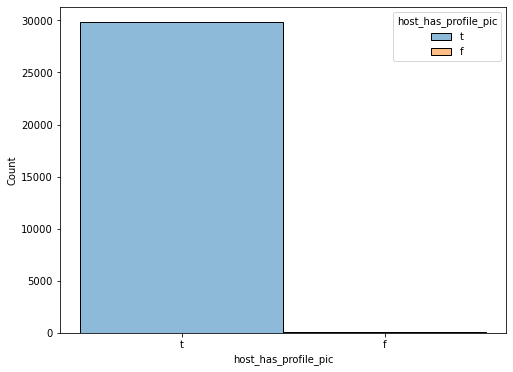

In [650]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(8, 6)
#sns.histplot(data=new_Airbnb_data, x='host_identity_verified',palette = sns.color_palette("tab10"),alpha = 1,shrink=.8)
sns.histplot(data=new_Airbnb_data, x='host_has_profile_pic', hue='host_has_profile_pic')

In [602]:
bins =np.linspace(min(new_Airbnb_data["review_scores_rating"]), max(new_Airbnb_data["review_scores_rating"]),4)
bins

array([0.        , 1.66666667, 3.33333333, 5.        ])

In [454]:
bins_log =np.logspace(min(new_Airbnb_data["review_scores_rating"]), max(new_Airbnb_data["review_scores_rating"]), num=4)

In [455]:
bins_log

array([1.00000000e+00, 4.64158883e+01, 2.15443469e+03, 1.00000000e+05])

In [603]:
group_names = ['low','Medium','High']

In [426]:
new_Airbnb_data_groups["review_scores_rating-binned"]=pd.cut(new_Airbnb_data_groups["review_scores_rating"],bins,labels=group_names,include_lowest=True)

In [436]:
new_Airbnb_data_groups[["review_scores_rating-binned","review_scores_rating"]].head(3)

,review_scores_rating-binned,review_scores_rating
0,High,4.00
1,High,4.84
2,High,4.68


In [438]:
new_Airbnb_data_groups[["review_scores_rating-binned","review_scores_rating"]].groupby(["review_scores_rating-binned"]).size()

review_scores_rating-binned
low         461
Medium      338
High      29184
dtype: int64

<AxesSubplot:xlabel='review_scores_rating-binned', ylabel='count'>

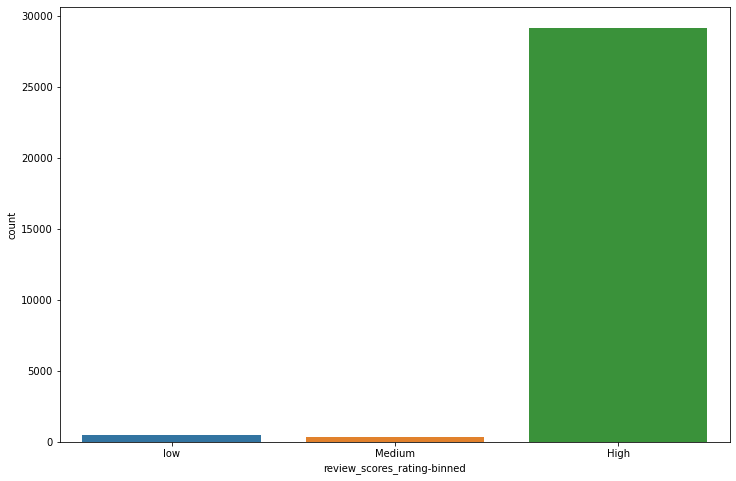

In [439]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.countplot(x="review_scores_rating-binned",data = new_Airbnb_data_groups)

In [523]:
#new_Airbnb_data=pd.read_csv("LosAngeles/new_Airbnb_data_neighbourhood_final.csv")

/home/rebeca/miniconda3/envs/mineros/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,9,10,19,24,25,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [604]:
new_Airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29983 entries, 0 to 32239
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  29983 non-null  object 
 1   name                         29981 non-null  object 
 2   description                  29009 non-null  object 
 3   neighborhood_overview        18461 non-null  object 
 4   picture_url                  29983 non-null  object 
 5   host_location                29879 non-null  object 
 6   host_about                   18079 non-null  object 
 7   host_response_time           21909 non-null  object 
 8   host_response_rate           21909 non-null  float64
 9   host_acceptance_rate         21909 non-null  float64
 10  host_is_superhost            29944 non-null  object 
 11  host_picture_url             29944 non-null  object 
 12  host_neighbourhood           24674 non-null  object 
 13  host_has_profile

# P-Value

In [503]:
from scipy import stats

In [504]:
lista_variables =[ 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews']

(29983, 41)

In [614]:
print("total de nulos:" ,new_Airbnb_data["number_of_reviews"].isnull().sum())

total de nulos: 0


In [615]:
print("total de nulos:" ,new_Airbnb_data['maximum_nights'].isnull().sum())

total de nulos: 0


In [618]:
new_Airbnb_data['bedrooms'].value_counts()

1.0     16731
2.0      5529
3.0      2617
4.0      1085
5.0       387
6.0        81
7.0        22
8.0         6
9.0         5
10.0        3
Name: bedrooms, dtype: int64

### Convertir data type a float en los rates

In [627]:
print("total de nulos:" ,new_Airbnb_data["host_acceptance_rate"].isnull().sum())
avg_host_acceptance_rate = new_Airbnb_data["host_acceptance_rate"].mean(axis=0)
print("promedio de host_acceptance_rate:",avg_host_acceptance_rate)

total de nulos: 8074
promedio de host_acceptance_rate: 0.009106522433701922


In [628]:
print("total de nulos:" ,new_Airbnb_data["host_response_rate"].isnull().sum())
avg_host_response_rate = new_Airbnb_data["host_response_rate"].mean(axis=0)
print("promedio de host_response_rate:",avg_host_response_rate)

total de nulos: 8074
promedio de host_response_rate: 0.9106522433703029


In [624]:
import math
avg_bedrooms = new_Airbnb_data["bedrooms"].mean(axis=0)
print("promedio de bedrooms decimales:",avg_bedrooms)
avg_bedrooms = math.ceil(avg_bedrooms)
print("promedio de bedrooms:",avg_bedrooms)
print("total de nulos:" ,new_Airbnb_data["bedrooms"].isnull().sum())

promedio de bedrooms decimales: 1.6125595103151213
promedio de bedrooms: 2
total de nulos: 3517


In [625]:
avg_beds = new_Airbnb_data["beds"].mean(axis=0)
print("promedio de beds con decimales:",avg_beds)
avg_beds = math.ceil(avg_beds)
print("promedio de beds:",avg_beds)
print("total de nulos:" ,new_Airbnb_data["beds"].isnull().sum())

promedio de beds con decimales: 1.9107082114429552
promedio de beds: 2
total de nulos: 585


# Reemplazo de nulos:

In [638]:
new_Airbnb_data["bedrooms"].replace(np.nan, 2, inplace=True)

In [639]:
print("total de nulos de bedrooms:" ,new_Airbnb_data["bedrooms"].isnull().sum())

total de nulos de bedrooms: 0


In [629]:
new_Airbnb_data["beds"].replace(np.nan, 2, inplace=True)

In [630]:
print("total de nulos de beds:" ,new_Airbnb_data["beds"].isnull().sum())

total de nulos de beds: 0


In [631]:
new_Airbnb_data["host_acceptance_rate"].replace(np.nan, avg_host_acceptance_rate, inplace=True)

In [632]:
print("total de nulos de host_acceptance_rate:" ,new_Airbnb_data["host_acceptance_rate"].isnull().sum())

total de nulos de host_acceptance_rate: 0


In [633]:
new_Airbnb_data["host_response_rate"].replace(np.nan, avg_host_response_rate, inplace=True)

In [634]:
print("total de nulos de host_response_rate:" ,new_Airbnb_data["host_response_rate"].isnull().sum())

total de nulos de host_response_rate: 0


In [655]:
print("total de nulos de min nights:" ,new_Airbnb_data["minimum_nights"].isnull().sum())
print("total de nulos de max nights:" ,new_Airbnb_data["maximum_nights"].isnull().sum())

total de nulos de min nights: 0
total de nulos de max nights: 0


In [671]:
new_Airbnb_data['correct_neighbourhood']

0         Culver City
1         Los Angeles
2        Santa Monica
3          Bellflower
4         Los Angeles
             ...     
32235     Los Angeles
32236     Los Angeles
32237     Los Angeles
32238     Los Angeles
32239     Los Angeles
Name: correct_neighbourhood, Length: 29983, dtype: object

<AxesSubplot:>

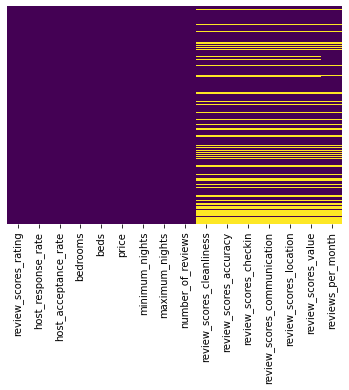

In [680]:
#new_Airbnb_data[['neighbourhood','property_type','room_type','host_has_profile_pic','host_identity_verified','correct_neighbourhood_cleansed','review_scores_rating', 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
 #                         'maximum_nights','number_of_reviews','beds']]
sns.heatmap(new_Airbnb_data[['review_scores_rating', 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','review_scores_cleanliness','review_scores_accuracy','review_scores_checkin',
                                  'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [ ]:
avg_beds = new_Airbnb_data["beds"].mean(axis=0)
print("promedio de beds con decimales:",avg_beds)
avg_beds = math.ceil(avg_beds)
print("promedio de beds:",avg_beds)
print("total de nulos:" ,new_Airbnb_data["beds"].isnull().sum())

In [688]:
lista_varibales_nulas= ['review_scores_cleanliness','review_scores_accuracy','review_scores_checkin',
                                  'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

In [691]:
def obtain_num_nulos(lista):
    for elem in lista:
        print("nulos total ",elem,":", new_Airbnb_data[elem].isnull().sum())
obtain_num_nulos(lista_varibales_nulas)

nulos total  review_scores_cleanliness : 7691
nulos total  review_scores_accuracy : 7692
nulos total  review_scores_checkin : 7700
nulos total  review_scores_communication : 7693
nulos total  review_scores_location : 7703
nulos total  review_scores_value : 7705
nulos total  reviews_per_month : 7379


In [705]:
def obtain_mean(lista):
    means = []
    for elem in lista:
        means.append(new_Airbnb_data[elem].mean(axis=0))
        print("promedio de",elem,":", new_Airbnb_data[elem].mean(axis=0))
    return means

means = obtain_mean(lista_varibales_nulas)

promedio de review_scores_cleanliness : 4.696825767091368
promedio de review_scores_accuracy : 4.774616661432921
promedio de review_scores_checkin : 4.848708881209925
promedio de review_scores_communication : 4.832488111260703
promedio de review_scores_location : 4.80427737881512
promedio de review_scores_value : 4.679498159619394
promedio de reviews_per_month : 2.040708281720062


In [708]:
lista_mean_variable = list(zip(lista_varibales_nulas,means))

In [709]:
lista_mean_variable

[('review_scores_cleanliness', 4.696825767091368),
 ('review_scores_accuracy', 4.774616661432921),
 ('review_scores_checkin', 4.848708881209925),
 ('review_scores_communication', 4.832488111260703),
 ('review_scores_location', 4.80427737881512),
 ('review_scores_value', 4.679498159619394),
 ('reviews_per_month', 2.040708281720062)]

In [713]:
for var,elem in zip(lista_varibales_nulas,means):
    print(var)
    print(elem)

review_scores_cleanliness
4.696825767091368
review_scores_accuracy
4.774616661432921
review_scores_checkin
4.848708881209925
review_scores_communication
4.832488111260703
review_scores_location
4.80427737881512
review_scores_value
4.679498159619394
reviews_per_month
2.040708281720062


In [714]:
def reemplazar_nulos(lista_varibales_nulas,lista_means):
    for var,elem in zip(lista_varibales_nulas,lista_means):
        new_Airbnb_data[var].replace(np.nan, elem, inplace=True)
reemplazar_nulos(lista_varibales_nulas,means)

In [715]:
obtain_num_nulos(lista_varibales_nulas)

nulos total  review_scores_cleanliness : 0
nulos total  review_scores_accuracy : 0
nulos total  review_scores_checkin : 0
nulos total  review_scores_communication : 0
nulos total  review_scores_location : 0
nulos total  review_scores_value : 0
nulos total  reviews_per_month : 0


<AxesSubplot:>

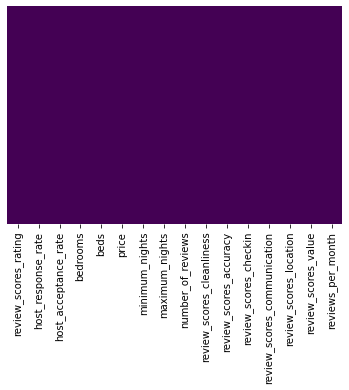

In [716]:
sns.heatmap(new_Airbnb_data[['review_scores_rating', 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','review_scores_cleanliness','review_scores_accuracy','review_scores_checkin',
                                  'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [634]:
print("total de nulos de host_response_rate:" ,new_Airbnb_data["host_response_rate"].isnull().sum())

total de nulos de host_response_rate: 0


In [ ]:
obtain_mean(lista_varibales_nulas)

In [651]:
print("total de nulos de property_type:" ,new_Airbnb_data["property_type"].isnull().sum())
print("total de nulos de room_type:" ,new_Airbnb_data["room_type"].isnull().sum())
print("total de nulos de host_has_profile_pic:" ,new_Airbnb_data["host_has_profile_pic"].isnull().sum())
print("total de nulos de host_identity_verified:" ,new_Airbnb_data["host_identity_verified"].isnull().sum())

total de nulos de property_type: 0
total de nulos de room_type: 0
total de nulos de host_has_profile_pic: 39
total de nulos de host_identity_verified: 39


<AxesSubplot:xlabel='review_scores_rating', ylabel='host_has_profile_pic'>

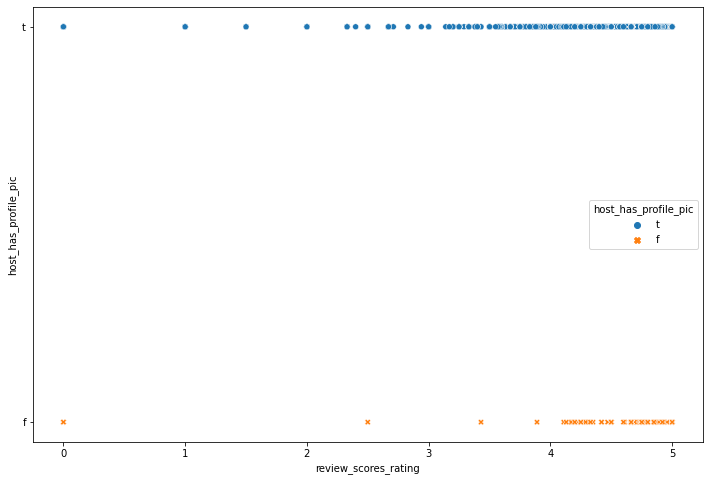

In [663]:
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="review_scores_rating", y="host_has_profile_pic", hue="host_has_profile_pic",style="host_has_profile_pic")

In [664]:
new_Airbnb_data["host_has_profile_pic"].replace(np.nan,False, inplace=True)
new_Airbnb_data["host_identity_verified"].replace(np.nan,False, inplace=True)

In [665]:
print("total de nulos de host_has_profile_pic:" ,new_Airbnb_data["host_has_profile_pic"].isnull().sum())
print("total de nulos de host_identity_verified:" ,new_Airbnb_data["host_identity_verified"].isnull().sum())

total de nulos de host_has_profile_pic: 0
total de nulos de host_identity_verified: 0


In [666]:
#new_Airbnb_data.to_csv("new_Airbnb_data_Limpia_Final.csv")

In [683]:
lista_variables_relevantes = ['property_type','room_type','host_has_profile_pic','host_identity_verified','review_scores_rating', 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','beds','correct_neighbourhood']
lista_varibales_correlacionar = ['review_scores_rating', 'host_response_rate','host_acceptance_rate', 'bedrooms', 'beds', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','review_scores_cleanliness','review_scores_accuracy','review_scores_checkin',
                                  'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

In [684]:
lista_varibales_correlacionar[0]

'review_scores_rating'

In [722]:
def coef_person(lista, y_variable='price'):
    pearson_corr_coef_list = []
    p_value_list = []
    for elem in lista:
        pearson_coef, p_value = stats.pearsonr(new_Airbnb_data[elem],new_Airbnb_data[y_variable])
        pearson_corr_coef_list.append(pearson_coef)
        p_value_list.append(p_value)
    return pearson_corr_coef_list,p_value_list

In [730]:
correlation_list,p_value_list = coef_person(lista_varibales_correlacionar, y_variable='price')

In [727]:
lista_varibales_correlacionar

['review_scores_rating',
 'host_response_rate',
 'host_acceptance_rate',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [732]:
df = pd.DataFrame(list(zip(lista_varibales_correlacionar,correlation_list,p_value_list)),
               columns =['varaible', 'Pearson_Correleation_coefficient','p-value'])
df

,varaible,Pearson_Correleation_coefficient,p-value
0,review_scores_rating,0.023935,3.400483e-05
1,host_response_rate,0.007282,2.073383e-01
2,host_acceptance_rate,0.007282,2.073383e-01
3,bedrooms,0.596742,0.000000e+00
4,beds,0.465284,0.000000e+00
5,price,1.000000,0.000000e+00
6,minimum_nights,-0.037409,9.200106e-11
7,maximum_nights,0.018800,1.131799e-03
8,number_of_reviews,-0.062020,5.985145e-27
9,review_scores_cleanliness,0.032578,1.677811e-08


In [733]:
def determinar_relevancia_correlacion(p_value):
    if p_value < 0.001:
        status = "significant"
    else:
        if p_value <0.05:
            status = "moderate_significant"
        else:
            if p_value <0.1:
                status = "weak_significant"
            else:
                if p_value > 0.1:
                    status = "no_significant"
    return status

In [736]:
def aplicar_status(p_value_list):
    lista_status = []
    for p_value in p_value_list:
        lista_status.append(determinar_relevancia_correlacion(p_value))
    return lista_status

In [738]:
status_list = aplicar_status(p_value_list)

In [739]:
se = pd.Series(status_list)
df['status'] = se.values

In [740]:
df

,varaible,Pearson_Correleation_coefficient,p-value,status
0,review_scores_rating,0.023935,3.400483e-05,significant
1,host_response_rate,0.007282,2.073383e-01,no_significant
2,host_acceptance_rate,0.007282,2.073383e-01,no_significant
3,bedrooms,0.596742,0.000000e+00,significant
4,beds,0.465284,0.000000e+00,significant
5,price,1.000000,0.000000e+00,significant
6,minimum_nights,-0.037409,9.200106e-11,significant
7,maximum_nights,0.018800,1.131799e-03,moderate_significant
8,number_of_reviews,-0.062020,5.985145e-27,significant
9,review_scores_cleanliness,0.032578,1.677811e-08,significant


In [741]:
# Hacer lo mismo con review_score_rating

In [743]:
correlation_list,p_value_list = coef_person(lista_varibales_correlacionar, y_variable='review_scores_rating')

In [744]:
df = pd.DataFrame(list(zip(lista_varibales_correlacionar,correlation_list,p_value_list)),
               columns =['varaible', 'Pearson_Correleation_coefficient','p-value'])

In [745]:
status_list = aplicar_status(p_value_list)

In [746]:
se = pd.Series(status_list)
df['status'] = se.values

In [747]:
df

,varaible,Pearson_Correleation_coefficient,p-value,status
0,review_scores_rating,1.000000,0.000000e+00,significant
1,host_response_rate,0.104938,3.566922e-74,significant
2,host_acceptance_rate,0.104938,3.566922e-74,significant
3,bedrooms,0.014012,1.525444e-02,moderate_significant
4,beds,0.006473,2.623390e-01,no_significant
5,price,0.023935,3.400483e-05,significant
6,minimum_nights,-0.019355,8.032626e-04,significant
7,maximum_nights,-0.033987,3.944111e-09,significant
8,number_of_reviews,0.109428,1.568731e-80,significant
9,review_scores_cleanliness,0.523292,0.000000e+00,significant


In [749]:
#new_Airbnb_data.to_csv("new_Airbnb_data_Limpia_Final.csv")

In [ ]:
df_anova = new_Airbnb_data[["review_scores_rating","price"]]
group_anova = df_anova.groupby(["review_scores_rating"])
anova_results_1 = stats.f_oneway

# host_response_rate vs price

In [682]:
pearson_coef, p_value = stats.pearsonr(new_Airbnb_data['review_scores_rating'],new_Airbnb_data['price'])
print("Pearson Correleation coefficient:", pearson_coef, "con p-value:", p_value)

Pearson Correleation coefficient: 0.02393460782062088 con p-value: 3.400483116422883e-05


# host_acceptance_rate vs price

- a heat map of the listings in NY 
    - the color represents the price 
    - the size of the circle represents the number of reviews

#  Análisis de datos geográficos

In [ ]:
new_Airbnb_data.plot(kind="scatter", x="", y="latitude", alpha=0.4,
    s=Airbnb_data["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

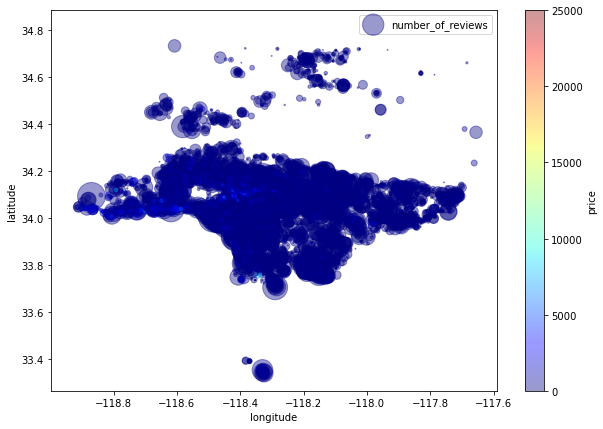

In [41]:
Airbnb_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=Airbnb_data["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [41]:
new_Airbnb_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31767 entries, 0 to 32239
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_url                  31767 non-null  object 
 1   name                         31765 non-null  object 
 2   description                  30698 non-null  object 
 3   neighborhood_overview        19599 non-null  object 
 4   picture_url                  31767 non-null  object 
 5   host_location                31655 non-null  object 
 6   host_about                   19122 non-null  object 
 7   host_response_time           23258 non-null  object 
 8   host_response_rate           23258 non-null  object 
 9   host_acceptance_rate         23458 non-null  object 
 10  host_is_superhost            31726 non-null  object 
 11  host_picture_url             31726 non-null  object 
 12  host_neighbourhood           25520 non-null  object 
 13  host_has_profile

# Análisis de Imágenes

In [306]:
# cuántas fotos tenemos
len(Airbnb_data['picture_url'])

32240

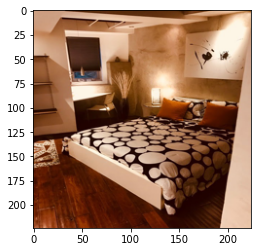

In [446]:
from PIL import Image
import requests
from io import BytesIO

IMAGE_SIZE = [224,224]

response = requests.get(Airbnb_data['picture_url'][4])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [448]:
Airbnb_data['picture_url'][4]

'https://a0.muscache.com/pictures/5147dcd2-efad-495c-8c31-d781cc626878.jpg'

In [452]:
popular['picture_url'][1190]

'https://a0.muscache.com/pictures/b12d69ec-02bb-4f51-b5cf-c060e57271f7.jpg'

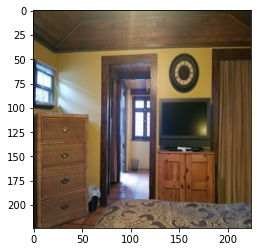

In [453]:
popular = new_Airbnb_data_dates[new_Airbnb_data_dates["number_of_reviews"]==915]
popular["picture_url"]
response = requests.get(popular['picture_url'][1190])
img = Image.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

In [11]:
import colorgram

rgb_colors = []
colors = colorgram.extract(img, 30)
for color in colors:
    r = color.rgb.r
    g = color.rgb.g
    b = color.rgb.b
    new_color = (r, g, b)
    rgb_colors.append(new_color)

print(rgb_colors)
print(len(rgb_colors))

[(69, 23, 6), (203, 156, 123), (144, 88, 48), (238, 211, 186), (114, 48, 18), (31, 2, 4), (180, 120, 71), (110, 59, 11), (224, 188, 156), (169, 117, 89), (65, 75, 91), (92, 77, 83), (220, 185, 164), (41, 54, 70), (162, 146, 151), (75, 58, 61), (51, 60, 77), (161, 156, 167), (200, 185, 186)]
19


In [12]:
Airbnb_data.price[4]

118.0

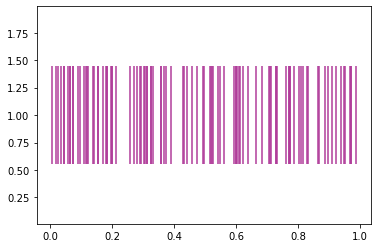

In [9]:
spikes = np.random.random(100)
plt.eventplot(spikes, orientation='horizontal', linelengths=0.9, color = [(.69, .23, .6)])

plt.show()

In [10]:
import turtle as turtle_module
import random

colours = rgb_colors
tim = turtle_module.Turtle()
turtle_module.colormode(255)
tim.speed("fastest")
tim.hideturtle()

def initial_position():
    tim.penup()
    tim.setheading(225)
    tim.forward(300)
    tim.setheading(0)

initial_position()

def move_right():
    for _ in range(10):
        tim.dot(20)
        tim.penup()
        tim.forward(50)
        tim.pencolor(random.choice(colours))


def move_left():
    tim.dot(20)
    tim.penup()
    tim.forward(-500)


def move_up():
    tim.setheading(90)
    tim.dot(20)
    tim.penup()
    tim.forward(50)
    tim.setheading(0)


for play in range(10):
    move_right()
    move_left()
    move_up()

screen = turtle_module.Screen()
screen.exitonclick()